In [10]:
import numpy as np
class LinearRegression:
    
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Append a column of ones to X to incorporate the constant term (bias)
        X_with_bias = self.add_bias_column(X)
        
        # Calculate the coefficients using the least squares method
        self.coefficients = self.calculate_coefficients(X_with_bias, y)

    def predict(self, X):
        X = np.array(X)
        # Add bias term to each row of X
        X_with_bias = np.insert(X, 0, 1, axis=1)
        return X_with_bias @ self.coefficients

    def add_bias_column(self, X):
        r = len(X)
        c = len(X[0]) + 1
        xn = [[1] * c for _ in range(r)]  # Initialize xn with independent rows
    
        for i in range(len(xn)):
            for j in range(1, len(xn[0])):
                xn[i][j] = X[i][j - 1]
    
        return xn
        
    def calculate_coefficients(self, X, y):
        X=np.array(X)
        y=np.array(y)
        return np.linalg.solve(X.T@X, X.T@y)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the .mat file
data = loadmat('house_data.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 25 09:04:48 2024', '__version__': '1.0', '__globals__': [], 'Xtest': array([[ 3.8869e+00,  1.0000e+01,  3.6590e+03, ...,  5.1500e+02,
         3.3680e+01, -1.1723e+02],
       [ 3.2721e+00,  1.1000e+01,  1.4790e+03, ...,  3.2700e+02,
         3.7390e+01, -1.2071e+02],
       [ 4.2500e+00,  2.4000e+01,  6.5170e+03, ...,  1.1980e+03,
         3.3680e+01, -1.1796e+02],
       ...,
       [ 2.7379e+00,  4.2000e+01,  1.3080e+03, ...,  3.0200e+02,
         3.4190e+01, -1.1838e+02],
       [ 2.0575e+00,  2.1000e+01,  2.5340e+03, ...,  5.1700e+02,
         3.5410e+01, -1.1902e+02],
       [ 2.5875e+00,  5.2000e+01,  8.1200e+02, ...,  2.4700e+02,
         3.7800e+01, -1.2241e+02]]), 'Xtrain': array([[ 2.9241e+00,  3.2000e+01,  1.0830e+03, ...,  1.7800e+02,
         3.8040e+01, -1.2111e+02],
       [ 4.8993e+00,  3.4000e+01,  3.3060e+03, ...,  5.8500e+02,
         3.7990e+01, -1.2255e+02],
       [ 5.0528e+00,  2.6000e+

In [12]:
print(data.keys())
i=0;
for key in data.keys():
    i=i+1;
    if (i==4):
        X_test=data[key]
    if (i==5):
        X_train=data[key]
    if (i==6):
        y_test=data[key]
    if (i==7):
        y_train=data[key]

dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'Xtrain', 'Ytest', 'Ytrain'])


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Predictions:", predictions)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Predictions: [[171743.59691017]
 [113119.44653395]
 [239509.91514663]
 ...
 [178650.37418712]
 [118724.77624915]
 [212937.70308811]]


In [14]:
def a(predictions,y_test):
    sty=0
    for i in range(len(predictions)):
        sty=sty+((predictions[i][0]-y_test[i][0])**2)
        
    sty=sty/(len(predictions))
    ertest=np.sqrt(sty)
    return ertest

Range of predict values:  (-56562.82754647173, 710798.8386912113)
Root mean squared error on test data:  69491.92877390933
Root mean squared error on train data:  69518.91758105875


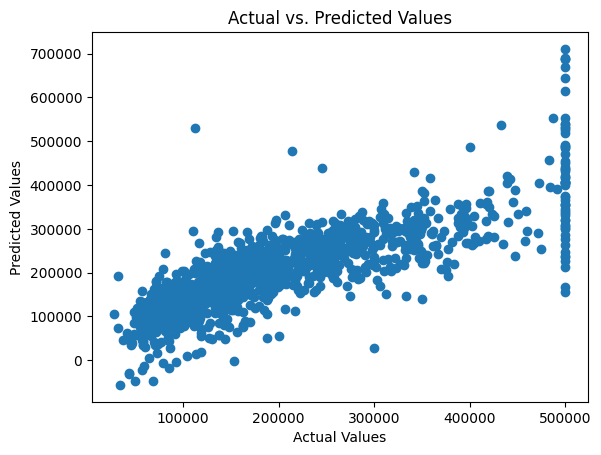

In [15]:
min_vals = np.min(predictions, axis=0)
max_vals = np.max(predictions, axis=0)
print("Range of predict values: ",(min_vals[0],max_vals[0]))
print("Root mean squared error on test data: ",a(predictions,y_test))
print("Root mean squared error on train data: ",a(model.predict(X_train),y_train))


import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

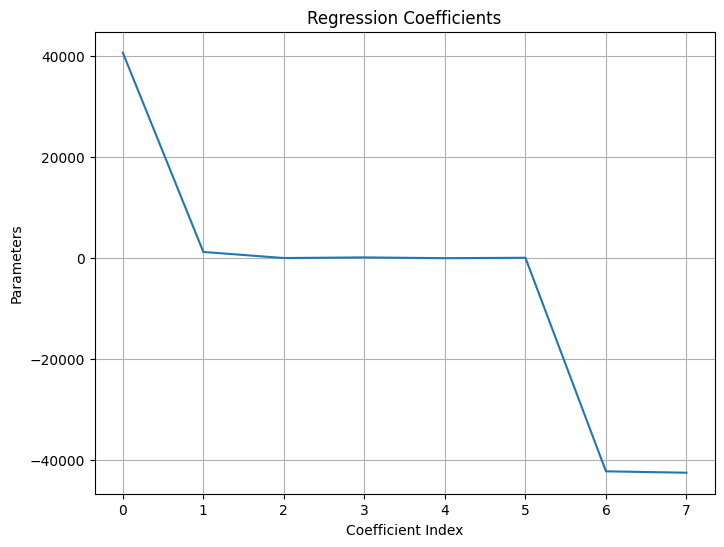

In [16]:
# Assuming you have computed the regression coefficients and stored them in the variable 'coefficients'
# coefficients = [theta0, theta1, theta2, ..., theta_n]

# Exclude the first coefficient (constant offset)
theta=[]
for i in range(len(model.coefficients)-1):
    theta.append(model.coefficients[i+1][0])
    
# Create an array of indices for the coefficients
indices = np.arange(len(theta))

# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.plot(indices, theta)
plt.xlabel('Coefficient Index')
plt.ylabel('Parameters')
plt.title('Regression Coefficients')
plt.xticks(indices)
plt.grid(True)
plt.show()


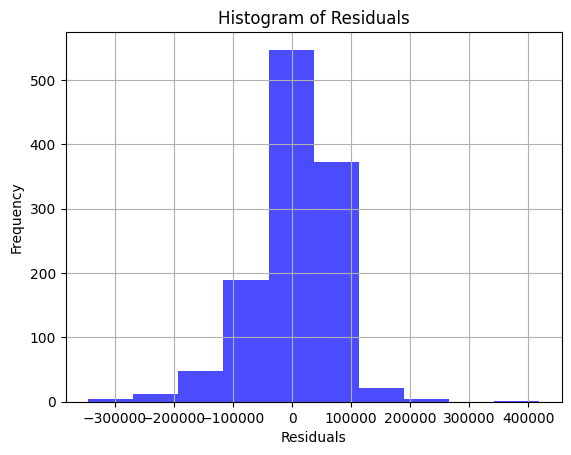

In [17]:
# Calculate residuals
residuals = predictions - y_test

# Plot histogram of residuals
plt.hist(residuals, bins=10, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()
